# Basic Machine Learning Workflow:

Import Libraries

In [ ]:
from fastai.vision.all import *
from rfcx_species_audio_detection.utils import *

Get path to data

In [ ]:
path_data = Path.home()/'data'
# path_data = Path.cwd()/'sample_data' # ← development

Create a subset of labels CSV matching the sample dataset

In [ ]:
train_tp = pd.read_csv(path_data/'train_tp.csv')
# flist = [f.stem for f in (path_data/'spectrogram_frq').ls() if f.suffix == '.png']
# train_tp = df_subset_rows(train_tp, column_str='recording_id', checklist=flist) # sample set

Create Dataloader

**Note**: sample dataset too small for validation.

In [ ]:
size = (np.array([1025,5262])/10).round().astype(np.int32)

bs = 128
val_pct = 0.2
batch_tfms = aug_transforms(mult=1.0, 
                            do_flip=False, 
                            max_rotate=0.0, 
                            max_warp=0.0, 
                            max_zoom=1.0, 
                            max_lighting=0.0)
item_tfms  = Resize(size=size)

In [ ]:
dataloader = ImageDataLoaders.from_df(train_tp, path=path_data, suff='.png', folder='spectrogram_frq', 
                valid_pct=val_pct, bs=bs, batch_tfms=batch_tfms, item_tfms=item_tfms)

In [ ]:
# dataloader = ImageDataLoaders.from_csv(path_data, csv_fname='train_tp.csv', suff='.png', folder='spectrogram_frq', 
#                 valid_pct=0.2, bs=2, batch_tfms=aug_transforms(do_flip=False, max_rotate=0.0))

In [ ]:
# x,y = dataloader.one_batch()
# display_image_tensor(x, figsize=(20,10));
# x.shape

Create Learner

In [ ]:
learner = cnn_learner(dataloader, resnet18)

LR Finder

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.010964781977236271)

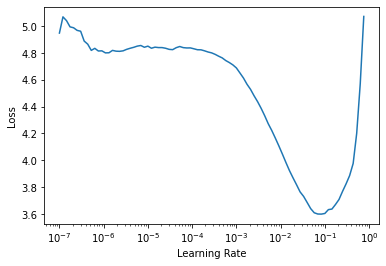

In [ ]:
learner.lr_find()

/Users/WPolatkan/Miniconda3/envs/audio/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


SuggestedLRs(lr_min=0.004786301031708717, lr_steep=4.786300905834651e-06)

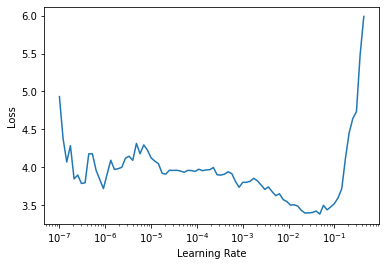

In [ ]:
learner.lr_find()

Tune Cycle

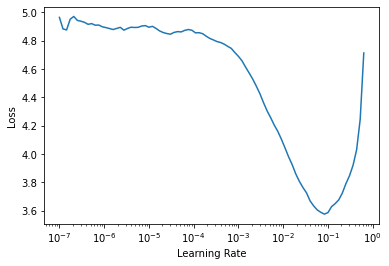

In [ ]:
lr,lr_steep = learner.lr_find()

In [ ]:
learner.fit_one_cycle(10, lr_max=lr)

epoch,train_loss,valid_loss,time
0,4.637186,3.695354,00:32
1,3.771409,3.336211,00:31
2,3.117450,3.637575,00:31
3,2.667375,3.654105,00:30
4,2.324219,3.648483,00:30
5,2.063146,3.477954,00:31
6,1.813726,3.439988,00:30
7,1.612392,3.245487,00:30
8,1.446783,3.079999,00:31
9,1.296266,3.002766,00:31


In [ ]:
learner.unfreeze()

SuggestedLRs(lr_min=4.786300996784121e-05, lr_steep=2.511886486900039e-05)

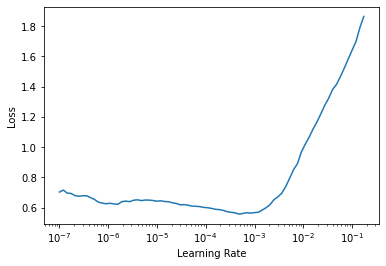

In [ ]:
learner.lr_find()